In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from os import listdir
from os.path import isfile, join,isdir
import IPython
from IPython.display import Audio
import librosa
from librosa.display import waveplot,specshow
from librosa.onset import onset_strength, onset_detect
from librosa.feature import melspectrogram, mfcc
import numpy as np
from collections import defaultdict
import mir_eval
from collections import OrderedDict
import sklearn
from sklearn.preprocessing import StandardScaler
import scipy


# Song Extraction from fma_small

1. Find the song folder path relative to the current computer
2. Retrieve the different genre classifications
3. Identify each song via its full path to song using index, to guarantee one-to-one mapping 
4. Sort in alphabetical order

In [2]:
#retrieving path to the fma_small directory and the corresponding meta data
HOME_DIR = IPython.utils.path.get_home_dir()

temp = join(HOME_DIR, 'Documents')
path_to_small_fma = join(temp, 'fma_small')
json_file = join(path_to_small_fma,'fma_small.json')
#locate meta_dta
print(path_to_small_fma)
df = pd.read_json(json_file)
print(json_file)


/Users/chibmac/Documents/fma_small
/Users/chibmac/Documents/fma_small/fma_small.json


In [3]:
#only choose genre as this is the label
df = df.loc[:,['top_genre']]
df['top_genre']=df['top_genre'].apply(lambda y: y.split(os.sep)[0])
#locate each individual song by its full path
df['temp'] = path_to_small_fma
str_index = ["%.2d" % x for x in df.index]

print(df['top_genre'].unique())
df['full_path_to_song'] = df.temp.map(str)+ "/"+ df['top_genre'].values+ "/"+ str_index+ ".mp3"
del df['temp']
df.sort_values(by = 'top_genre', inplace = True)
df.head()


['Electronic' 'Rock' 'Old-Time ' 'Indie-Rock' 'Jazz' 'Folk' 'Pop'
 'Psych-Rock' 'Punk' 'Hip-Hop']


top_genre                                  full_path_to_song
100538  Electronic  /Users/chibmac/Documents/fma_small/Electronic/...
43206   Electronic  /Users/chibmac/Documents/fma_small/Electronic/...
43199   Electronic  /Users/chibmac/Documents/fma_small/Electronic/...
43153   Electronic  /Users/chibmac/Documents/fma_small/Electronic/...
43124   Electronic  /Users/chibmac/Documents/fma_small/Electronic/...

''' genre and number of elements in genre'''
genre_count = []
for genre in genre_list:
    genre_count.append(df['top_genre'].value_counts()[genre])
    
genre_count
zipped = zip(genre_sorted_list,genre_count)
for genre,num_of_songs in zipped:
    print(genre,num_of_songs)
    for i in range(num_of_songs):
        song =  join(full_path_to_genre, file[df.index[i]])
        

In [4]:
genre_and_count = df['top_genre'].value_counts().sort_index()
print(genre_and_count)

Electronic    400
Folk          400
Hip-Hop       400
Indie-Rock    400
Jazz          400
Old-Time      400
Pop           400
Psych-Rock    400
Punk          400
Rock          400
Name: top_genre, dtype: int64


In [5]:
song_counts = [0]
ordered_genres = [] 
full_song_df = OrderedDict()
for i,genre in enumerate(genre_and_count.index):
    temp = df['top_genre'].value_counts()[genre]
    ordered_genres.append(genre)
    song_counts.append(temp)
    
    
num_of_genre = np.shape(genre_and_count)[0]
all_songs_path = df['full_path_to_song'].values    


In [6]:
num_of_genre = np.shape(genre_and_count)[0]
all_songs_path = df['full_path_to_song'].values

dict_paths = OrderedDict()

print(ordered_genres)

for i,genre in enumerate(ordered_genres):
    str1=genre
    str2 = "_path"
    genre_path = "".join((str1,str2))
    print(genre_path)



['Electronic', 'Folk', 'Hip-Hop', 'Indie-Rock', 'Jazz', 'Old-Time ', 'Pop', 'Psych-Rock', 'Punk', 'Rock']
Electronic_path
Folk_path
Hip-Hop_path
Indie-Rock_path
Jazz_path
Old-Time _path
Pop_path
Psych-Rock_path
Punk_path
Rock_path


In [7]:
num_of_genre = np.shape(genre_and_count)[0]
all_songs_path = df['full_path_to_song'].values

print(num_of_genre)

10


In [8]:
num_of_genre = np.shape(genre_and_count)[0]
all_songs_path = df['full_path_to_song'].values

dict_paths = OrderedDict()

cumulative_sum = np.cumsum(song_counts,dtype=int)
#print(cumulative_sum)
for i,genre in enumerate(ordered_genres):
    str1=genre
    str2 = "_paths"
    genre_paths = "".join((str1,str2))
    print(genre_paths)
    dict_paths[genre_paths] = all_songs_path[cumulative_sum[i]:cumulative_sum[i+1]]

#list with songs with electronic paths to songs
print(type(dict_paths['Electronic_paths']))

Electronic_paths
Folk_paths
Hip-Hop_paths
Indie-Rock_paths
Jazz_paths
Old-Time _paths
Pop_paths
Psych-Rock_paths
Punk_paths
Rock_paths
<class 'numpy.ndarray'>


In [9]:
genre_signals_dict = OrderedDict()
for genre_path,ptesig in dict_paths.items():
    str1=genre_path[:-5]
    str2 = "signals"
    genre_signals = "".join((str1,str2))       
    try:
        first_three = dict_paths[genre_path][:3]
        genre_signals_dict[genre_signals] = [
        librosa.load(p)[0] for p in first_three]
    except IOError as exc:
        print("Unable to locate folder")
        #raise IOError("%s: %s" % (ptesig, exc.strerror))
        

    

Unable to locate folder


Electronic_signals
Folk_signals
Hip-Hop_signals
Indie-Rock_signals
Jazz_signals
Pop_signals
Psych-Rock_signals
Punk_signals
Rock_signals


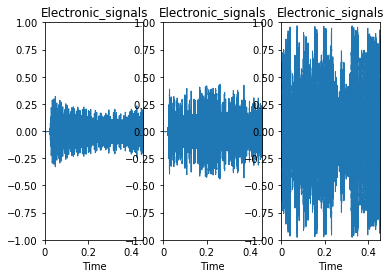

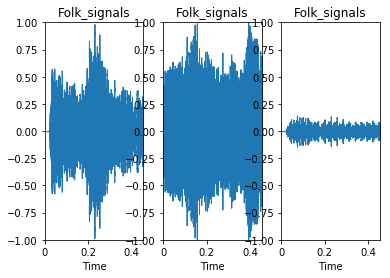

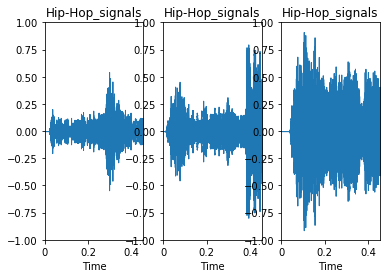

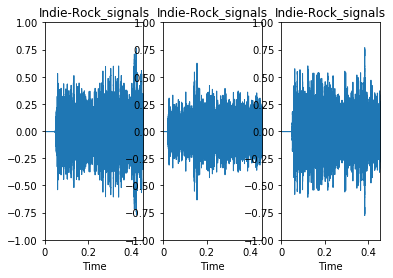

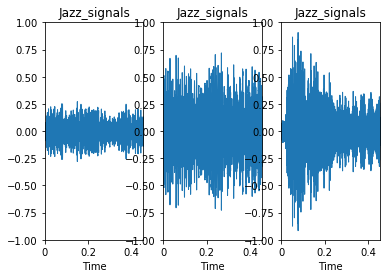

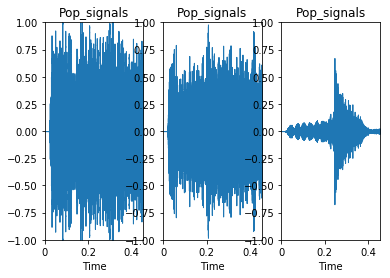

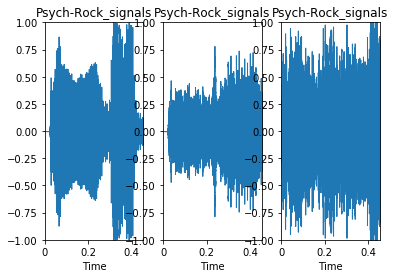

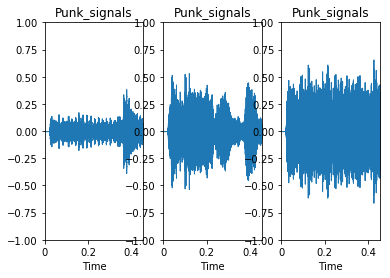

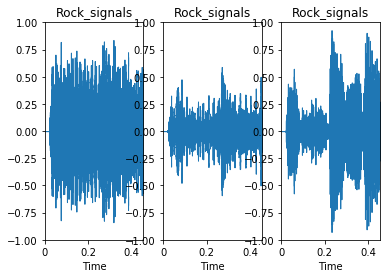

In [10]:
num_of_songs = 3# stesigs - signal to each song in genre_signal
for genre_signal,stesigs in genre_signals_dict.items(): 
    print(genre_signal)
    for i, x in enumerate(stesigs):
        plt.subplot(1, num_of_songs, i+1)
        librosa.display.waveplot(x[:10000])
        plt.ylim(-1, 1)
        plt.title(genre_signal)
    plt.figure()
        
        

# Basic Work Flow

## Segmentation - > Feature Extraction -> Classification


1. Segmentation:
2. Feature Extraction:
3. Machine learning:

https://ccrma.stanford.edu/wiki/MIR_workshop_2014

In [13]:
song_num = 0
sampling_rate = 44100
song = df['full_path_to_song'].values
print(len(song))
current_song_path = all_songs[song_num]
print(song)
y, sr = librosa.load(current_song_path, sampling_rate)
print(song[song_num])
# Play it back!
Audio(data=y, rate=sampling_rate)

4000
['/Users/chibmac/Documents/fma_small/Electronic/100538.mp3'
 '/Users/chibmac/Documents/fma_small/Electronic/43206.mp3'
 '/Users/chibmac/Documents/fma_small/Electronic/43199.mp3' ...,
 '/Users/chibmac/Documents/fma_small/Rock/693.mp3'
 '/Users/chibmac/Documents/fma_small/Rock/41813.mp3'
 '/Users/chibmac/Documents/fma_small/Rock/9999.mp3']
/Users/chibmac/Documents/fma_small/Electronic/100538.mp3


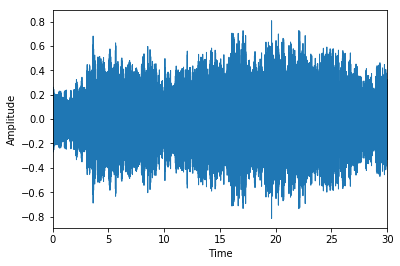

In [14]:
waveplot(y,sr)
plt.ylabel('Amplitude')

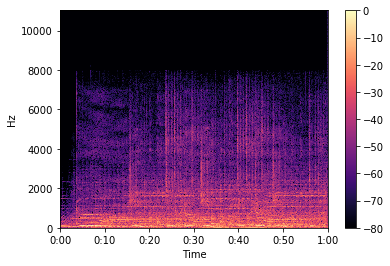

In [15]:
stft = librosa.stft(y)
log_power = librosa.logamplitude(stft**2, ref_power=np.max)

specshow(log_power, x_axis='time', y_axis='linear')
plt.colorbar()

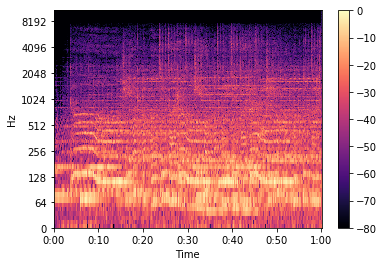

In [16]:
'''plot log as we want to emphasis changes that are occuring at 
low frequencies'''
specshow(log_power, x_axis='time', y_axis='log')
plt.colorbar()

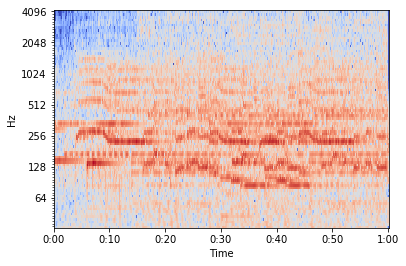

In [17]:
#constant q transform is for a direct log-frequency analysis
#in addition, one vertical move represents one semi-tone, so things are
#shit invariant vertically aswell as horizontally
cqt = librosa.cqt(y,sr)

specshow(librosa.logamplitude(cqt**2), x_axis = 'time', y_axis = 'cqt_hz')

In [19]:
#Other Spectral Features: Mel spectra, MFCC, Tonnetz
#spectral contrast, bandwidth e.t.c

mel_spec = librosa.feature.melspectrogram(y=y,sr =sr)
MFCC = librosa.feature.mfcc(y = y,sr = sr)
tonnetz = librosa.feature.tonnetz(y =y, sr = sr)


#harmonic representation usually means throwing away transients are a 
#random drum sound won't be that relevant
y_harmonics, y_percussive = librosa.effects.hpss(y)

Audio(data=y, rate=sr)

In [25]:
beat_times = librosa.frames_to_time(beats)
y_click = mir_eval.sonify.clicks(beat_times, sr,length = len(y))

Audio(data= y + y_click, rate = sr)

# Retrieve Audio

1. Time Domain Representation (Wave plot)
2. Frequency Domain Representation (Spectogram)

In [70]:
sampling_rate = 44100
current_song_path = "/Users/chibmac/Documents/fma_small/Hip-Hop/134.mp3"
sig_amp, sr = librosa.load(current_song_path, sampling_rate)
# Play it back!
Audio(data=sig_amp, rate=sampling_rate)

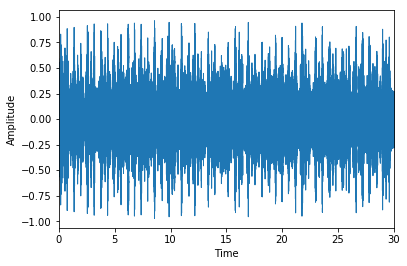

In [71]:
waveplot(sig_amp,sr)
plt.ylabel('Amplitude')

# Spectral features

#### moments in stats i.e mean and variance, here we have anothers such as spectral centroid, bandwidth, skewness, kurtosis

In [102]:
#4d feature vector of signal

#Perceptually, 
#it has a robust connection with the impression of "brightness" of a sound.
def extract_features(signal):
    from librosa.feature import (zero_crossing_rate,spectral_centroid,
    spectral_bandwidth, spectral_constrast)
    return [
        zero_crossing_rate(signal)[0, 0],
        spectral_centroid(signal)[0, 0],
        spectral_bandwidth(signal)[0, 0],
        spectral_contrast(signal)[0, 0]
    ]

In [73]:
num_of_songs = 3# stesigs - signal to each song in genre_signal
for genre_signal,stesigs in genre_signals_dict.items(): 
    demo_features = np.array([extract_features(x) for x in stesigs])

        

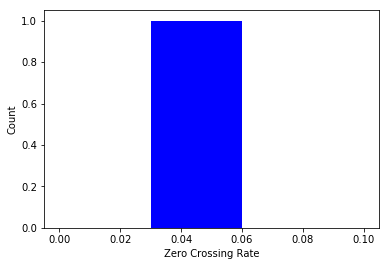

In [74]:
plt.hist(demo_features[:,0], color='b', range=(0, 0.1))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

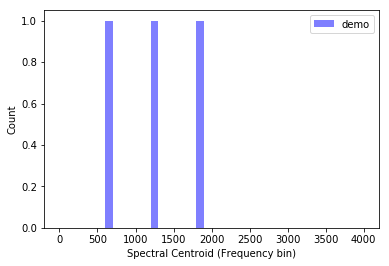

In [75]:
plt.hist(demo_features[:,1], color='b', range=(0, 4000), bins=40, alpha=0.5)
plt.legend(('demo',))
plt.xlabel('Spectral Centroid (Frequency bin)')
plt.ylabel('Count')

In [76]:
#feature scaling
feature_table = np.vstack((demo_features))
print (feature_table.shape)

(3, 2)


In [77]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_table)
print (training_features.min(axis=0))
print (training_features.max(axis=0))

[-1. -1.]
[ 1.  1.]


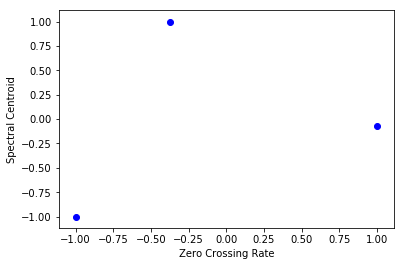

In [78]:
plt.scatter(training_features[:10,0], training_features[:10,1], c='b')
plt.scatter(training_features[10:,0], training_features[10:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

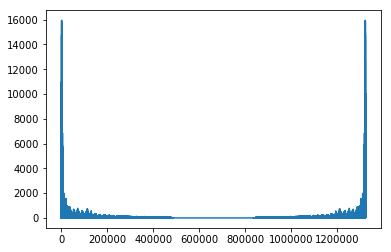

In [86]:
sig_fft = scipy.fft(sig_amp)
sig_fft_mag = np.absolute(sig_fft)


plt.plot(sig_fft_mag[:len(sig_fft)]) # magnitude spectrum

# Regular Spectogram

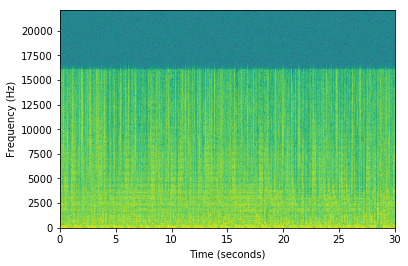

In [98]:
S, freqs, bins, im = plt.specgram(sig_amp, NFFT=1024, noverlap=512, Fs=44100)
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')


# Mel Spectogram

In [89]:
S = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024)
logS = librosa.logamplitude(S)

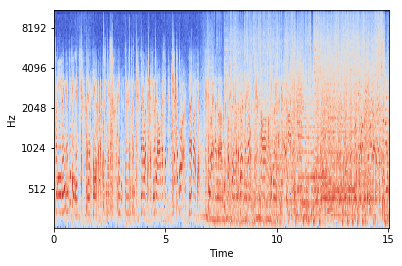

In [91]:
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='mel')

# Constant-Q-transform

#### constant q transform is for a direct log-frequency analysis in addition, one vertical move represents one semi-tone, so things are shit invariant vertically aswell as horizontally

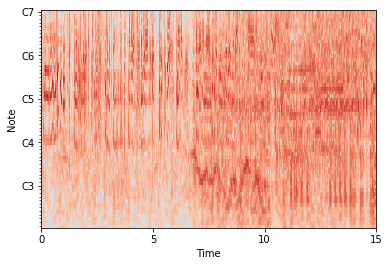

In [97]:
fmin = librosa.midi_to_hz(36)
C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=60)
logC = librosa.logamplitude(C)
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')

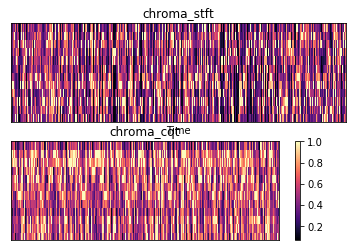

In [99]:
'''Spectral features are often used to analyse harmony or timbre
Usually the product of a spectogram and a filter bank

Pitch vs Pitch class
Chroma measures the amout of energy in each pitch class,
frame1, frame2,frame3 and collaspe down (many-to-one mapping) expectation 
of pitch class'''

chroma_stft = librosa.feature.chroma_stft(y = y, sr= sr, n_chroma = 12,
                                          n_fft=4096)
chroma_cqt = librosa.feature.chroma_cqt(y = y,sr = sr)

plt.figure()
plt.subplot(2,1,1)
specshow(chroma_stft)
plt.xlabel('Time')
plt.title('chroma_stft')
plt.subplot(2,1,2)
specshow(chroma_cqt)
plt.title('chroma_cqt')
plt.colorbar()

# Genre Recognition


In [ ]:
genre_signals_dict = OrderedDict()
for genre_path,ptesig in dict_paths.items():
    str1=genre_path[:-5]
    str2 = "signals"
    genre_signals = "".join((str1,str2))       
    try:
        genre_signals_dict[genre_signals] = [
        librosa.load(p)[0] for p in dict_paths[genre_path]]
    except IOError as exc:
        print("Unable to locate folder")
        #raise IOError("%s: %s" % (ptesig, exc.strerror))
        

    

In [ ]:
sampling_rate = 44100
#number of coefficients
n_mfcc = 12

s_brams = []
S_log_brahms = []
mfcc_brams_feature = []
for genre_signal,stesigs in genre_signals_dict.items():
    #f1 mean sig amp
    sig_amp = stesigs
    mel_spec = melspectrogram(sig_amp,sampling_rate)
    log_amp = logamplitude(sig_amp,sampling_rate)
    
    #features
    mfcc_brahms = mfcc.(sig_amp,sampling_rate)
    #normalised_mfcc_brams
    norm_mfcc_brams = StandardScaler().fit_transform(mfcc_brahms)
    print(stesigs)

        
        